$\textbf{Bayes' Theorem. (1P)}$ Remember the definition of Bayes' Theorem from statistics. The probability $P(A|B)$ for an event $A$ given an event $B$ is given as:
		
\begin{equation*}
    P(A|B) = \frac{P(A) P(B|A)}{P(B)}
\end{equation*}

Imagine the following scenario: A restaurant has a set of waiters/waitresses A, B, C, ...; they are all represented on a website, and customers can express their satisfaction with individual waiters/waitresses after their visit. Unfortunately, due to a malfunction with the billing system, for an entire month, no data on which waiter served which customer exists, and so the corresponding tips could not be wired to the waiters automatically. 
The owner of the restaurant contacts you (and you are, fortunately, familiar with Bayes' Theorem) to throw together a small Python program which redistributes all incoming tips based on customer satisfaction and working hours. 
Here's a few things the owner tells you in addition to the data they provide: 

- Not all waiters/waitresses work the same number of hours.

- Based on experience, customers do not tip when they were unhappy with the service.

- If customers were happy, they always tip around $10\%$. 

- The typical table bill, in previous months, was at around $63.45$€, before tips.

- Lacking a better alternative, you may assume every waiter served the same number of customers per hour. 

- The total gross income this month was $58542.43$€. You may ignore taxes - the owner promised to take care of those themselves.


$\textbf{Hint:}$ Not all the given information might be needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using $\texttt{pandas.read\_csv}$, load the $\texttt{ex19\_data.csv}$ file available on Moodle. 

In [2]:
df = pd.read_csv("ex19_data.csv",sep=';')
name = df["Name"]
hours = df["HoursPerWeek"]
score = df["Score"]
df

,Name,HoursPerWeek,Score
0,Markus,50.0,0.88
1,Claudia,20.0,0.95
2,Matthew,40.0,0.82
3,Anna,40.0,0.91
4,Marie,50.0,0.71
5,Raphael,20.0,0.75
6,Bex,35.0,0.87


Compute the amount of money that was tipped, given the assumptions above and using the information given about the waiters/waitresses. Using the same arguments, compute the total of all bills before tips.

In [4]:
tip_per = 0.1
gross_income = 58542.43
avg_bill = 63.45 #before tip 
avg_score = np.average(score,weights=hours)
new_tip_per = tip_per * avg_score

tip_money = gross_income - gross_income * (1 / (1+new_tip_per))
tip_money

num_order = gross_income / (avg_bill * ((1+new_tip_per)))
num_order

851.4807572421049

Split the tips among the waiters/waitresses such that work hours and satisfaction scores are taken into account, using Bayes' Theorem. To be clear: You want to compute the probability for a certain waiter/waitress to receive a tip, given that the customer wants to tip.

In [5]:
probs = []
p_A = hours/sum(hours)   #x being water
p_BA = score
p_B = avg_score   #probability of tip
for i in range(len(hours)):
    prob = (p_A[i]*p_BA[i])/(p_B)
    probs.append(prob)

tip = [tip_money*x for x in probs]
tip

[932.2211678700055,
 402.5500497620478,
 694.9285069576405,
 771.2011479651865,
 752.1329877132997,
 317.8026708647746,
 645.1394218554925]

Output a $\texttt{ex19\_solution.csv}$ file. In it, all information from the original file should be reproduced, plus a column indicating fraction of total tips as well as absolute share of tips (in €). Rows should be sorted in descending order of tips, from the waiter/waitress receiving the highest share of tips to the lowest share. $\textbf{Hint}$: You can sort $\texttt{pandas.DataFrame}$ objects using the $\texttt{pandas.DataFrame.sort\_values}$ method.

In [6]:
df["Tips"] = tip
final_df = df.sort_values(by=["Tips"], ascending=False)
final_df

,Name,HoursPerWeek,Score,Tips
0,Markus,50.0,0.88,932.221168
3,Anna,40.0,0.91,771.201148
4,Marie,50.0,0.71,752.132988
2,Matthew,40.0,0.82,694.928507
6,Bex,35.0,0.87,645.139422
1,Claudia,20.0,0.95,402.550050
5,Raphael,20.0,0.75,317.802671


$\textbf{Statistics of a data set. (2P)}$ In this exercise, you will analyze the structural information of a given material by using simple statistical tools.

The AuCu bi-layer is a two-dimensional (2-D) film. In the ground state ($\textit{i.e.}$, near null temperature, $T \sim 0$K), it shows a completely flat layer of Au atoms above a completely flat layer of Cu atoms (see the figure). At $T \sim 0$K, computational simulations (specifically, Density Functional Theory calculations) predict a value of $0.227$nm for the distance between the two layers. If the system is heated up, then atoms vibrate, changing the structural properties of the film (e.g., the layers are no longer completely flat).


In the package $\texttt{ex20\_MD.tar}$, you can find the output files obtained by molecular dynamic simulations, which calculate the evolution in time (in steps of $1$fs) of the AuCu bi-layer at specific temperatures. The simulation of $6878$fs time-steps is divided in three subsequential files:


- $\texttt{OUTCAR_1}$,  $T \sim 100$K  with $500$fs steps,
- $\texttt{OUTCAR_2}$,  $T \sim 300$K  with $1378$fs steps,
- $\texttt{OUTCAR_3}$,  $T \sim 300$K  with $5000$fs steps.


Unfortunately, the simulations for $T \sim 300$K got interrupted during the first attempt (due to a problem with the super computer running the calculations, which may happen often), thus, you have gotten two files ($\texttt{OUTCAR\_2}$ and $\texttt{OUTCAR\_3}$).

Moreover, an additional simulation was performed independently, heating up the system and, simultaneously, applying a strain which elongates the film along its lateral directions:
$\texttt{OUTCAR\_strain}$  $T \sim 300$K  with $5000$fs steps.

Technical information which may help you and/or answer your most curious questions:
- The simulations include $50$ atoms of Cu and 50 atoms of Au.

- Periodic boundary conditions are applied ($\textit{i.e.}$, simulations of an infinitely large 2-D film).
- A rigid drift ($\textit{i.e.}$, the rigid translation) of the system along z occurs, but it is not physically relevant (there is nothing but the 2-D AuCu film in the simulation universe).
- The atomic positions are stored in every $\texttt{OUTCAR}$ file after the line with the word $\texttt{POSITION}$, followed by a line of dashes. The first 3 columns in the following 100 lines represent the $(x,y,z)$ coordinates of the Cu and Au atoms. Every occurrence of $\texttt{POSITION}$ refers to a specific time step, starting from $1$fs and progressively increasing by $1$fs. 
- In order to extract the atomic positions from the $\texttt{OUTCAR}$ files, you may therefore search for the string $\texttt{POSITION}$, skip one row, extract the first three columns for 100 lines; then, you repeat this procedure for every occurrence of $\texttt{POSITION}$ ($\textit{i.e.}$, for every time step)
- You can get information on the effective temperature at every time step by looking for the string "$\texttt{temperature}$" in the $\texttt{OUTCAR}$ files (not required for the tasks above).

- Positions in the $\texttt{OUTCAR}$ files are stored in Angström.

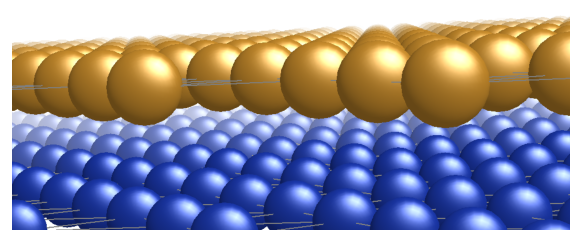

In [1]:
import matplotlib.pyplot as plt

plt.figure(dpi=120)
plt.imshow(plt.imread('ex20_vmd.png'))
plt.axis('off')
plt.show()

1. Extract the atomic positions at every time step from $\texttt{OUTCAR\_1}$, $\texttt{OUTCAR\_2}$ and $\texttt{OUTCAR\_3}$, and merge the data in one unique database with the time running from $1$fs to $6878$fs.

In [7]:
file = open('OUTCAR_1',"rt")
pos1 = file.readlines()
file.close()

file = open('OUTCAR_2',"rt")
pos2 = file.readlines()
file.close()

file = open('OUTCAR_3',"rt")
pos3 = file.readlines()
file.close()

In [28]:
def position_extract(data):
    word = "POSITION"
    position = []
    for i in range(len(data)):
        if word in data[i]:
            position.append(i+2)
    raw = []
    for i in range(len(position)):
        a = data[position[i]:position[i]+100]
        for j in range(len(a)):
            raw.append(a[j].split()[0:3])

    return raw

In [29]:
outcar1 = position_extract(pos1)
outcar1_mat = np.reshape(outcar1,(len(outcar1), 3))

outcar2 = position_extract(pos2)
outcar2_mat = np.reshape(outcar2,(len(outcar2), 3))

outcar3 = position_extract(pos3)
outcar3_mat = np.reshape(outcar3,(len(outcar3), 3))

In [31]:
position_matrix_all = np.concatenate((outcar1_mat,outcar2_mat,outcar3_mat))
#len(position_matrix_all)

687800

#### First 50 entries are for Au, the other 50 is for Cu.

In [139]:
position_matrix_au = np.array([position_matrix_all[100*i:100*i+50] for i in range(int(len(position_matrix_all)/100))])
position_matrix_cu = np.array([position_matrix_all[100*i+50:100*i+100] for i in range(int((len(position_matrix_all)/100)))])

In [140]:
len(position_matrix_au)

6878

In [141]:
#position_matrix_au

In [143]:
position_matrix_cu.shape

(6878, 50, 3)

2. At every time step, calculate the average position along z of the Cu and Au layers, separately.



In [147]:
position_matrix_cu[:,:,2]  #extracting the z axis 
position_matrix_cu[:,:,2][0]
au_mean = np.mean(position_matrix_au[:,:,2].astype(float),axis=1)  #without astype it doesnt work. 

In [148]:
cu_mean = np.mean(position_matrix_cu[:,:,2].astype(float),axis=1) #axis=1 := for each timestep

3. At every time step, calculate the standard deviation of the z coordinate both for the Cu- and Au atoms, separately.



In [150]:
au_std = np.std(position_matrix_au[:,:,2].astype(float),axis=1)  
cu_std = np.std(position_matrix_cu[:,:,2].astype(float),axis=1) 

4. Calculate the average distance between the Au and Cu layers.

In [151]:
avg_dis = au_mean - cu_mean

5. Plot your results in a graph including the average distance (from task 4), and the standard deviations of Cu and Au atoms (from task 3), as functions of time. Show also the ground state value for the distance between the two layer.

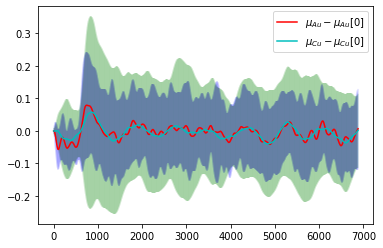

In [155]:
plt.errorbar(np.arange(len(au_mean)), au_mean-au_mean[0], yerr = au_std, color="b",alpha=0.01)
plt.plot(au_mean-au_mean[0],color="r",label = "$\mu_{Au} - \mu_{Au}[0]$")
plt.errorbar(np.arange(len(cu_mean)), cu_mean-cu_mean[0], yerr = cu_std, color="g",alpha=0.01)
plt.plot(cu_mean-cu_mean[0],color="c",label = "$\mu_{Cu} - \mu_{Cu}[0]$")
plt.legend()

$\textbf{Statistical moments of histograms. (2P)}$ You are given data on olympic athletes in the form of $\texttt{ex21\_data.csv}$, a filtered version of the complete dataset found at [Kaggle.com](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data). From this, you are going to analyse medal distributions.

Using $\texttt{pandas.read\_csv}$, load the $\texttt{ex21\_data.csv}$ file available on Moodle. If the $\texttt{"Medal"}$ field for an athlete is $\texttt{"NaN"}$, assume the athlete has not won a medal.  
			
			

In [15]:
medals = pd.read_csv("ex21_data.csv")
medals = medals.fillna("0")

Assume you want to count Gold as 3 points, Silver as 2 points and Bronze as 1 point. Extract the following data from your $\texttt{pandas.DataFrame}$, separately for male and female participants: The total participant number per age, the total score per age, and the average score per participant (of given age) per age. In case an athlete participated in multiple competitions, you can count them as multiple participants.
			


In [21]:
medals_dict = {"0":0, "Gold":3,"Silver":2,"Bronze":1}
score = []
for i in list(medals["Medal"]):
    score.append(medals_dict[i])  
medals["Score"] = score


In [22]:
ages = medals["Age"].to_numpy(dtype=np.integer)
scores = medals["Score"].to_numpy(dtype=np.integer)
gender = medals["Sex"].map({'M': 0, 'F': 1}).to_numpy(dtype=np.integer)

In [23]:
max_age = np.max(ages)
participant_per_age = np.zeros((max_age+1,2))
score_per_age = np.zeros((max_age+1,2))
medal_per_age = np.zeros((max_age+1,2))

for (sex,age,score) in zip(gender,ages,scores):
    participant_per_age[age][sex] += 1 
    score_per_age[age][sex] += score
    medal_per_age[age][sex] += 1

age = np.linspace(0,max_age+1,max_age+1)

score_per_age_part = np.where(participant_per_age== 0, 0, score_per_age/participant_per_age)

<ipython-input-23-493a4889bf45>:13: RuntimeWarning: invalid value encountered in divide
  score_per_age_part = np.where(participant_per_age== 0, 0, score_per_age/participant_per_age)


Plot the histograms of these 6 distributions into a single figure with 6 subplots (row 0 corresponds to male participants, row 1 to female participants).

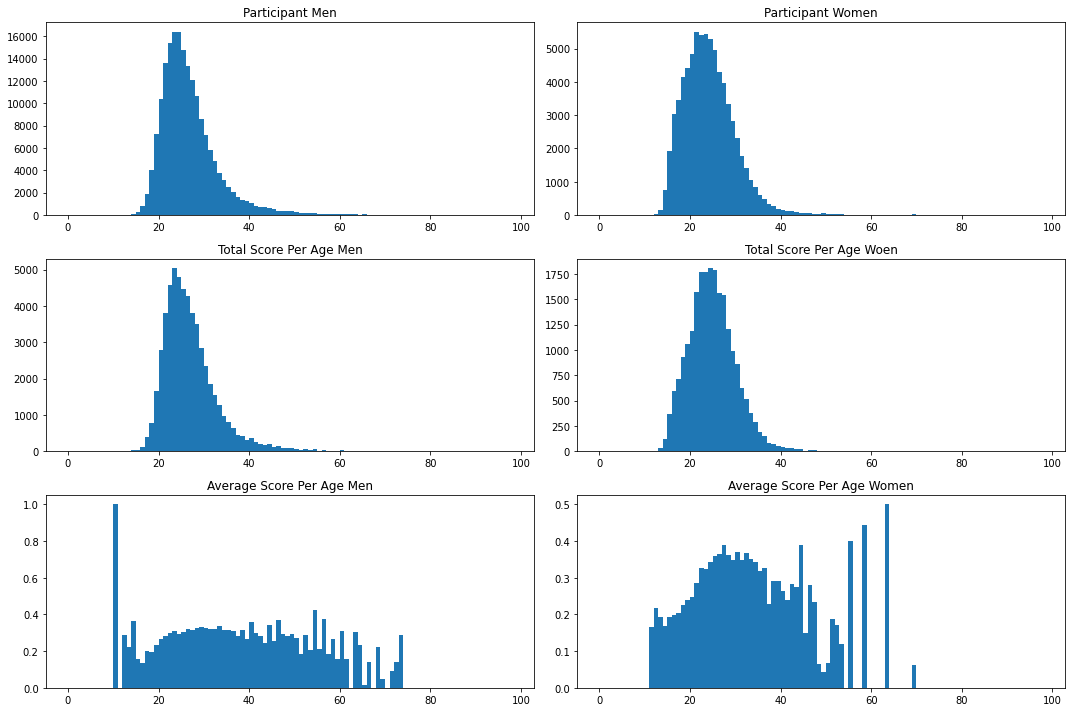

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title("Participant Men")
plt.hist(age, weights = participant_per_age[:,0],bins=len(age))  #Histogram böyle kullanılıyormuş ag

plt.subplot(3,2,2)
plt.title("Participant Women")
plt.hist(age, weights = participant_per_age[:,1],bins=len(age))  #Histogram böyle kullanılıyormuş ag

plt.subplot(3,2,3)
plt.title("Total Score Per Age Men")
plt.hist(age, weights = score_per_age[:,0],bins=len(age))  #Histogram böyle kullanılıyormuş ag

plt.subplot(3,2,4)
plt.title("Total Score Per Age Woen")
plt.hist(age, weights = score_per_age[:,1],bins=len(age))  #Histogram böyle kullanılıyormuş ag

plt.subplot(3,2,5)
plt.title("Average Score Per Age Men")
plt.hist(age, weights = score_per_age_part[:,0],bins=len(age))  #Histogram böyle kullanılıyormuş ag

plt.subplot(3,2,6)
plt.title("Average Score Per Age Women")
plt.hist(age, weights = score_per_age_part[:,1],bins=len(age))  #Histogram böyle kullanılıyormuş ag

plt.tight_layout()  #in order to get rid of the numbers and arrays down there

Compute the following (weighted) statistical quantities of participant ages of all 6 distributions: The mean, standard deviation, skewness and kurtosis. $\textbf{Hint:}$ The weighted mean is given as $\bar{x} = \sum_{i} x_i \cdot w(x_i) / \sum_{i} w(x_i)$. The $n$-th weighted moment is given as $m_k = \sum_{i} (x_i - \bar{x})^k \cdot w(x_i) / \sum_{i} w(x_i)$. The skewness is given as $m_3 / m_2^{3/2}$. The kurtosis is given as $m_4 / m_2^2$. To be clear: $x$ is the age,
$w(x)$ are the different distributions.

In [25]:
def statistical_values(values,weights):
    mean = np.average(values, weights=weights)
    variance = np.average((values-mean)**2,weights=weights) #momenta_2nd
    momenta_3rd = np.average((values-mean)**3,weights=weights)
    momenta_4th = np.average((values-mean)**4,weights=weights)
    skewness = momenta_3rd / (variance)**1.5
    kurtosis = momenta_4th / (variance)**2

    return np.array([mean,np.sqrt(variance),skewness,kurtosis])

In [26]:
statistical_values(age,participant_per_age[:,1])

array([23.97754965,  5.85495757,  1.26608944,  7.65823833])